# The Guardian Article Distribution Analysis

Utilized The Guardian's API to get articles from <u>2000 -  present</u> with the keyword "**Philippines**," followed by analysis, with the general goal of looking into the distribution of articles across a period of time and gaining insights into the newspaper's editorial focus.

Skills used:
- acquired data using API
- utilized pandas, matplotlib, nltk and collections libraries
- tried a bit of Natural Language Processing
- EDA on The Guardian's articles

Findings:
- The Guardian published the most articles in years **2013 and 2020**. 
- In 2013, **November** outstandingly saw the most published articles for the year. 
- In November 2013:
 - The surge of articles published seems to be because of the **Haiyan Typhoon, or Super Typhoon Yolanda** as known by the Filipino locals, according to an analysis of article headlines published at that time.
 - Unsurprisingly, the most common sections were **'World news' and 'Environment.'**
- In 2020, most articles were published in **February, March and April**.
- In Feb.-Apr. 2020:
 - Upon analysis of the article headlines published, it seems that the high publication rate was because of the **COVID-19 pandemic**.
 - Majority of the articles were in the **'World news'** section.
- Overall, The Guardian's most common news products related to the "Philippines" are **articles, followed by liveblogs**. The most common section was overwhelmingly **'World news,' followed distantly by 'Opinion' and 'Environment'**.


Further analysis:
- An analysis, sentiment analysis for example, of opinion articles about the Philippines, due to the interesting result that 'Opinion' is the second most common article section overall.


Data Acquisition adopted from Analyst Adithya's video (https://youtu.be/Nf1U62XxDmU?si=yq4TXr0USzKLca6S)

In [45]:
# API key: here

In [4]:
url = 'https://content.guardianapis.com/search?q=philippines&from-date=2000&api-key=putHere'

In [5]:
# import libraries

import pandas as pd
import requests

import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from collections import Counter

In [6]:
response = requests.get(url)
print(response)

<Response [200]>


In [7]:
# json

x = response.json()
print(x)

{'response': {'status': 'ok', 'userTier': 'developer', 'total': 8574, 'startIndex': 1, 'pageSize': 10, 'currentPage': 1, 'pages': 858, 'orderBy': 'relevance', 'results': [{'id': 'world/2023/oct/13/ferdinand-marcos-jr-drops-philippines-holiday-marking-toppling-of-father', 'type': 'article', 'sectionId': 'world', 'sectionName': 'World news', 'webPublicationDate': '2023-10-13T11:20:09Z', 'webTitle': 'Ferdinand Marcos Jr drops Philippines holiday marking toppling of father', 'webUrl': 'https://www.theguardian.com/world/2023/oct/13/ferdinand-marcos-jr-drops-philippines-holiday-marking-toppling-of-father', 'apiUrl': 'https://content.guardianapis.com/world/2023/oct/13/ferdinand-marcos-jr-drops-philippines-holiday-marking-toppling-of-father', 'isHosted': False, 'pillarId': 'pillar/news', 'pillarName': 'News'}, {'id': 'world/2023/sep/08/british-australian-man-jailed-in-philippines-claims-authorities-fabricated-evidence', 'type': 'article', 'sectionId': 'world', 'sectionName': 'World news', 'web

In [8]:
# loop through all pages

urllist = []

for i in range(1,857):
    a = 'https://content.guardianapis.com/search?q=philippines&from-date=2000&api-key=e9eaf2ef-00d6-47a6-89cf-10386627a2f2&page='
    b = str(i)
    c = a+b
    urllist.append(c)

urllist;

In [9]:
# function to read all the urls in urllist into json

info = []

def json(url1):
    response = requests.get(url1)
    x = response.json()
    info.append(x)

In [10]:
# run json function in all url

output = [json(url1) for url1 in urllist]

In [11]:
info;

In [12]:
# finding total number of pages
info[0]['response']['pages']

858

In [13]:
# getting result of the 10th latest article headline
info[0]['response']['results'][9]['webTitle']

'Philippines: 26 people killed after overloaded ferry capsizes amid Typhoon Doksuri winds'

In [14]:
# looping through all the articles to get specific info for analysis

finallist = []

try:
    for page in range(0,857):
        for article in range (0, 10):
            value = dict(
            webtitle = info[page]['response']['results'][article]['webTitle'],
            sectionname = info[page]['response']['results'][article]['sectionName'],
            pubdate = info[page]['response']['results'][article]['webPublicationDate'],
            type = info[page]['response']['results'][article]['type']
            )
            finallist.append(value)
except IndexError:
    print('done')

done


In [15]:
finallist;

In [16]:
# make 'finallist' into DataFrame

newdata = pd.DataFrame(finallist)
newdata;

In [17]:
# remove time in pubdate

newdata['pubdate'] = newdata['pubdate'].str.split('T').str[0]

newdata;

# ANALYSIS

In [18]:
# convert 'pubdate' to datetime
newdata['pubdate'] = pd.to_datetime(newdata['pubdate'])

newdata;

## Published articles by year and month

In [16]:
# group and count the number of articles by year and month
date_count = newdata.groupby([newdata['pubdate'].dt.year, newdata['pubdate'].dt.month_name()])['pubdate'].count()

print(date_count)

pubdate  pubdate  
2000     April        24
         August       22
         December     20
         February      9
         January       7
                      ..
2023     June         17
         March        31
         May          31
         October      40
         September    63
Name: pubdate, Length: 286, dtype: int64


In [17]:
# count articles published per year, sort the index to be chronological

year_count = newdata['pubdate'].dt.year.value_counts().sort_index()

print(year_count)

2000    220
2001    286
2002    250
2003    244
2004    246
2005    216
2006    228
2007    267
2008    264
2009    232
2010    201
2011    284
2012    295
2013    608
2014    506
2015    566
2016    547
2017    423
2018    356
2019    391
2020    673
2021    530
2022    363
2023    364
Name: pubdate, dtype: int64


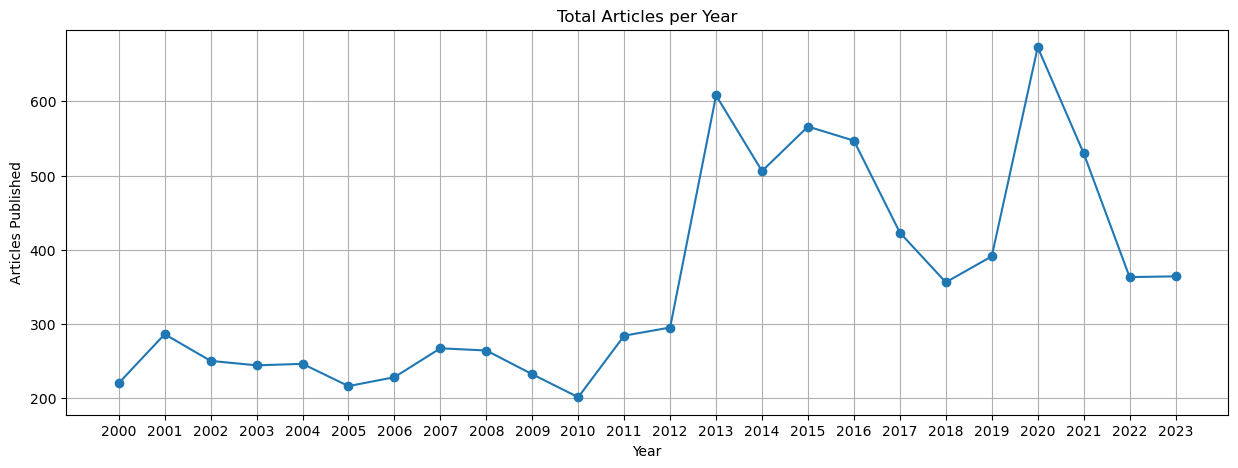

In [18]:
# create a line graph to present above data

plt.figure(figsize=(15, 5))
plt.plot(year_count.index, year_count.values, marker='o')
plt.title('Total Articles per Year')
plt.xlabel('Year')
plt.ylabel('Articles Published')
plt.grid(True)
plt.xticks(year_count.index)

plt.show()

### Investigate the rise of articles published in 2013

In [19]:
# publication count per month in 2013

# filter 2013

yr_2013 = newdata[newdata['pubdate'].dt.year == 2013]

month_count_2013 = yr_2013['pubdate'].dt.month.value_counts().sort_index()

print(month_count_2013)

1      42
2      48
3      30
4      19
5      31
6      35
7      26
8      30
9      33
10     43
11    213
12     58
Name: pubdate, dtype: int64


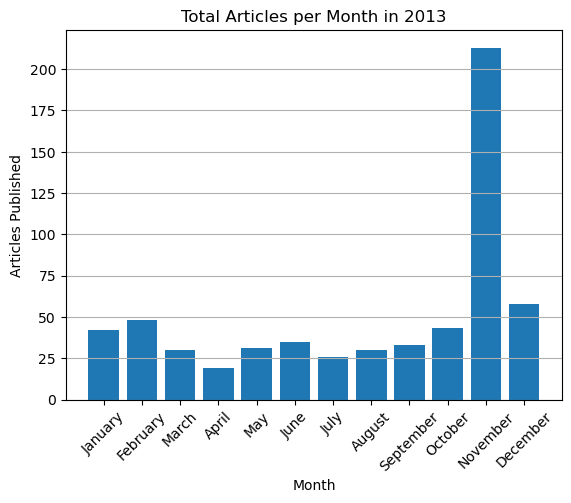

In [20]:
# create a bar graph to present above data

plt.bar(month_count_2013.index, month_count_2013.values)
plt.title('Total Articles per Month in 2013')
plt.xlabel('Month')
plt.ylabel('Articles Published')
plt.grid(axis='y')

# change x-axis to month names
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.xticks(range(1, 13), month_names, rotation=45)

plt.show()

### Identify the most common topic of articles published in Nov. 2013


In [27]:
# filter articles for November 2013
nov2013 = newdata[(newdata['pubdate'].dt.year == 2013) & (newdata['pubdate'].dt.month == 11)]

In [28]:
# most common words used in headline

cus_stopwords = stopwords.words('english') + ['says', 'say']

# function to preprocess and count words

def word_count(text):
    # split webtitle into words
    words = text.split()

    # remove punctuations, covert to lowercase
    words = [word.strip(' .,-–!?(){}[]"\'|/').lower() for word in words]
    
    # remove stopwords
    words = [word for word in words if word not in cus_stopwords]
    
    # filter empty strings
    words = [word for word in words if word]
    
    # count words
    word_count = Counter(words)
    
    return word_count


# apply function
words_count = nov2013['webtitle'].apply(word_count)

# combine word counts from all rows
combined_counts = words_count.sum()

# get most common words
common_words = combined_counts.most_common()

# print
print(common_words[:10])

[('typhoon', 96), ('haiyan', 50), ('philippines', 46), ('haiyan:', 44), ('climate', 36), ('change', 21), ('aid', 13), ('video', 13), ('disaster', 12), ('survivors', 10)]


In [29]:
# type count

type_count = nov2013['type'].value_counts()

print(type_count)

article     174
liveblog     15
video        13
gallery       8
picture       3
Name: type, dtype: int64


In [36]:
# section count for Nov. 2013 articles

section_count = nov2013['sectionname'].value_counts()

print(section_count)

World news                                  88
Environment                                 26
Global development                          16
Opinion                                     13
Guardian Sustainable Business               11
Technology                                   6
Politics                                     6
News                                         5
Society                                      5
Voluntary Sector Network                     5
Travel                                       4
Working in development                       4
Sport                                        4
Australia news                               3
Science                                      2
Fashion                                      2
Global                                       2
Global Development Professionals Network     2
Public Leaders Network                       1
Games                                        1
Music                                        1
Life and styl

### Investigate the rise of published articles in 2020

In [25]:
# publication count per month in 2020

# filter 2020

yr_2020 = newdata[newdata['pubdate'].dt.year == 2020]

month_count_2020 = yr_2020['pubdate'].dt.month.value_counts().sort_index()

print(month_count_2020)

1     26
2     92
3     78
4     90
5     55
6     51
7     47
8     45
9     55
10    43
11    41
12    50
Name: pubdate, dtype: int64


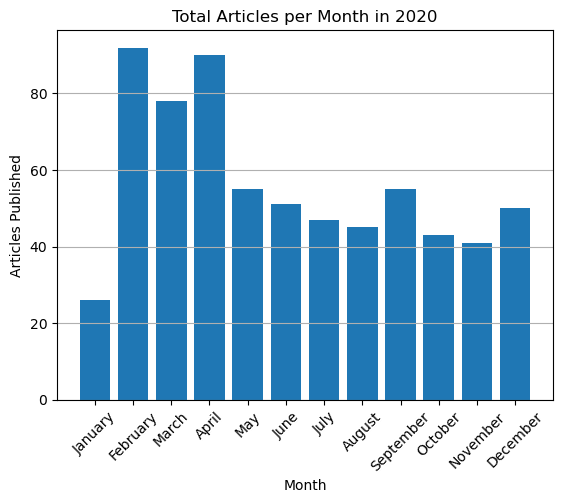

In [26]:
# create a bar graph to present above data

plt.bar(month_count_2020.index, month_count_2020.values)
plt.title('Total Articles per Month in 2020')
plt.xlabel('Month')
plt.ylabel('Articles Published')
plt.grid(axis='y')

# change x-axis to month names
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.xticks(range(1, 13), month_names, rotation=45)

plt.show()

### Investigate the rise of published articles in Februrary - April 2020

In [32]:
# filter articles for Feb-April 2020
f_a2020 = newdata[(newdata['pubdate'].dt.year == 2020) & (newdata['pubdate'].dt.month.isin([2, 3, 4]))]

In [33]:
# type count

type_count = nov2013['type'].value_counts()

print(type_count)

article     174
liveblog     15
video        13
gallery       8
picture       3
Name: type, dtype: int64


In [35]:
# section count for Feb-April 2020 articles

section_count2020 = f_a2020['sectionname'].value_counts()

print(section_count2020)

World news            181
Global development     14
Australia news         13
Environment             8
Opinion                 7
US news                 6
Business                4
Politics                3
Science                 2
Football                2
Travel                  2
Society                 2
Stage                   1
Culture                 1
Film                    1
Food                    1
Fashion                 1
Books                   1
Animals farmed          1
Community               1
UK news                 1
Law                     1
Games                   1
Global                  1
Sport                   1
Media                   1
Money                   1
News                    1
Name: sectionname, dtype: int64


In [40]:
# most common words used in headline

cus_stopwords = stopwords.words('english') + ['says', 'say', 'happened']

# apply word_count function
words_count2020 = f_a2020['webtitle'].apply(word_count)

# combine word counts from all rows
combined_counts2020 = words_count2020.sum()

# get most common words
common_words2020 = combined_counts2020.most_common()

# print
print(common_words2020[:10])

[('coronavirus', 78), ('covid-19', 31), ('coronavirus:', 29), ('cases', 28), ('china', 27), ('uk', 25), ('us', 22), ('death', 17), ('glance', 16), ('confirmed', 15)]


# Analysis of ALL articles acquired

In [41]:
# type count

type_count_all = newdata['type'].value_counts()

print(type_count_all)

article        7662
liveblog        757
video            50
gallery          48
picture          37
interactive       5
audio             1
Name: type, dtype: int64


In [42]:
# section count

section_count_all = newdata['sectionname'].value_counts()

print(section_count_all)

World news                          2708
Opinion                              587
Environment                          523
Global development                   402
US news                              346
                                    ... 
Animals farmed                         1
What's possible? Ask Toronto           1
Guardian Masterclasses Australia       1
Community                              1
Freshers week                          1
Name: sectionname, Length: 73, dtype: int64


In [44]:
# headline word count

# most common words used in headline

cus_stopwords = stopwords.words('english') + ['says', 'say', 'happened']

# apply word_count function
words_count_all = newdata['webtitle'].apply(word_count)

# combine word counts from all rows
combined_count_all = words_count_all.sum()

# get most common words
common_words_all = combined_count_all.most_common()

# print
print(common_words_all[:20])

[('philippines', 533), ('new', 392), ('world', 390), ('us', 378), ('china', 285), ('uk', 250), ('climate', 210), ('global', 208), ('typhoon', 192), ('trump', 160), ('war', 155), ('review', 146), ('coronavirus', 144), ('cases', 143), ('death', 125), ('day', 123), ('workers', 122), ('covid', 122), ('change', 119), ('first', 118)]
